# **Atributos del dataset Stroke Prediction**

1.   id: unique identifier - Identificador Unico 
2.   gender: "Male", "Female" or "Other" - Género: "Masculino", "Femenino" u "otro"
3.   age: age of the patient - Edad: Edad del Paciente
4.   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension - hipertensión : 0 si el paciente no es hipertenso, 1 si el paciente es hipertenso
5.   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease - Enfermedad del corazón: 0 si el paciente no tiene enfermedad del corazón, 1 si el paciente tiene enfermedad del corazón
6.  ever_married: "No" or "Yes" - Casado alguna vez: "No" o "si"
7.  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" - Tipo de trabajo: "Niños", "trabajo en el gobierno", "privado" o "trabajador autónomo"
8.  Residence_type: "Rural" or "Urban" - tipo de residencia: "urbana" o "rural"
9.  avg_glucose_level: average glucose level in blood - Nivel de glucosa medio: Nivel de glucosa medio en sangre
10. bmi: body mass index - IMC: Indice de masa corporal (peso en kilos/altura en centimetros al cuadrado)
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* - Fumador: "Solia Fumar", "nunca fumó", "fuma", "desconocido"
12. stroke: 1 if the patient had a stroke or 0 if not - ACV - 1 si el pacienciente tuvo un ACV, 0 si no lo tuvo

**Note: "Unknown" en smoking_status significa que la información no está disponible para ese paciente



# **Importamos Librerias y lectura del Dataset**

***Importando librerias***

In [ ]:
import pandas as pd             #control del datframe
import numpy as np              #manejo de series
import seaborn as sns           #graficar
import matplotlib.pyplot as plt #graficar
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


***Leyendo el Dataset***

In [ ]:
project= pd.read_csv('healthcare-dataset-stroke-data.csv')
project.head() #Para visualizar las primera líneas

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


El dataset nos muestra el registro de las 5 primeras personas que han sufrido o no un accidente cerebrovascular

In [ ]:
project.tail() #Para visualizar las últimas líneas

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


El dataset nos muestra los 5 últimos registros de las personas que han sufrido o no un accidente cerebrovascular

# **Analisis exploratorio del dataset**

***Analizando las dimendiones del DataFrame***

In [ ]:
#Se imprimen las dimensiones del data frame en filas "Rows" y columnas "columns"
print('Number of rows are', project.shape[0], 'and number of columns are', project.shape[1])

Number of rows are 5110 and number of columns are 12


***Buscando Valores Nulos***

In [ ]:
#Se buscan los valores nulos usando .isnull() y se los expresa como porcentaje
project.isnull().sum()/len(project)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
#Se presenta la cantidad nominal de valores nulos
project.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Se puede observar que la columna **bmi** tiene valores **nulos** , con una diferencia de 201

***Descartar la columna "Id"***

In [ ]:
#Se decide quitar la columna "id" ya esos datos no son de utilidad para el proyecto
project.drop('id', axis = 1, inplace=True)
project.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***Estadísticas generales del dataset***

In [ ]:
# se presentan las estadisticas generales del data set
project.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


La columna **bmi**, tiene una desviación estándar de 7 , tambien que la media es aprox 28 y el **50%** es 28, se plantea la posibilidad de cambiar los valores nulos por la mediana , haciendo uso de **fillna**

***Cambiando valores nulos por la mediana en la columna "bmi"***

In [ ]:
#Se presentan las medianas de las distintas variables
project.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                  45.000
hypertension          0.000
heart_disease         0.000
avg_glucose_level    91.885
bmi                  28.100
stroke                0.000
dtype: float64

In [ ]:
#Se reemplazan los valores nulos del indice de masa corporal por la mediana
project['bmi'] = project['bmi'].fillna(project['bmi'].median())
project.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***Consultando sobre los datos nulos***

In [ ]:
#se presenta la cantidad de valores nulos para cada variable
project.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Se puede observar que no hay ningún dato nulo

***Analizando la información de los datos. Dtype***

In [ ]:
#se presenta la información del data set
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Se puede visualizar 3 tipos de datos. Object, Int64 y Float64

***Buscando columnas repetidas***

In [ ]:
project[project.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


No existe ningún dato duplicado, si hubiera muchos duplicados buscar con el detalle

In [ ]:
project.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Se puede visualizar que la columan **age**, está en **float64** . Gender,ever_married, work_type, residence_type y smoking_status , tienen el tipo de dato como **object**

---



***Cambiando el tipo de dato de la columna "Age"***

In [ ]:
#float por int
project['age'] = project['age'].astype('int')

***Contenidos de la columna "age"***

In [ ]:
pd.unique(project['age'])

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  1, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        0, 41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10, 19,  6])

***Realizar una copia del project, para su tratamiento***

In [ ]:
data_numerica = project.copy(deep=True)
data_numerica 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


***Cambiando etiquetas por valor numérico "Male":0 and "Female":1***

In [ ]:
#se buscan los valores unicos de la columna "gender"
data_numerica['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
#Se utiliza una función para reemplazar "Male" por "0" y "Female" por "1"
def change(col):
    if col == 'Male':
        return 0
    elif col =='Female':
        return 1
    else:
        return 2

data_numerica['gender'] = data_numerica['gender'].apply(change)
data_numerica.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,0,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Se visualiza los datos cambiados en la columna gender

***Cambiando etiquetas por valor numérico "YES":1 and "NO":0***

In [ ]:
#se buscan los valores unicos de la columna "ever_married"
data_numerica['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data_numerica['ever_married'] = pd.get_dummies(data_numerica['ever_married'], drop_first=True)
data_numerica.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,0,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


Se puede visualizar los datos cambiados en la columna ever_married

***Cambiando etiquetas por valor numérico 
'Private':0
'Self-employed':1
'Govt_job':2
'children':3
other 4 ***


In [ ]:
#Se utiliza una función para reemplazar "Private" por 0 "Self-employed" por 1  "Govt_job" por 2  "children" por 3  "other" por 4
def alter(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4

data_numerica['work_type'] = data_numerica['work_type'].apply(alter)
data_numerica.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,0,Urban,228.69,36.6,formerly smoked,1
1,1,61,0,0,1,1,Rural,202.21,28.1,never smoked,1
2,0,80,0,1,1,0,Rural,105.92,32.5,never smoked,1
3,1,49,0,0,1,0,Urban,171.23,34.4,smokes,1
4,1,79,1,0,1,1,Rural,174.12,24.0,never smoked,1


Se puede visualizar que los datos han sido cambiados

***Cambiando etiquetas por valor numérico  columna Residence_type --> Urban:1 y Rural:0***

In [ ]:
#se buscan los valores unicos de la columna "Residence_type"
data_numerica['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
#Se utiliza una función para reemplazar "Urban" por 1 "Rural" por 0
data_numerica['Residence_type'] = pd.get_dummies(data_numerica['Residence_type'], drop_first=True)
data_numerica.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,0,1,228.69,36.6,formerly smoked,1
1,1,61,0,0,1,1,0,202.21,28.1,never smoked,1
2,0,80,0,1,1,0,0,105.92,32.5,never smoked,1
3,1,49,0,0,1,0,1,171.23,34.4,smokes,1
4,1,79,1,0,1,1,0,174.12,24.0,never smoked,1


Se puede visualizar que los datos han sido cambiados enla columna residence_type



***Cambiando etiquetas por valor numérico columna smoking_status, donde :formerly smoked': 0,'never smoked':1,'smokes':2,'Unknown':3 ***


In [ ]:
#se buscan los valores unicos de la columna "smoking_status"
data_numerica['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
#Se utiliza una función para reemplazar "formerly smoked" por 0 "never smoked" por 1 "smokes" por 2 y "Unknown" por 3
def change1(col):
    if col == 'formerly smoked':
        return 0
    elif col == 'never smoked':
        return 1
    elif col == 'smokes':
        return 2
    else:
        return 3

data_numerica['smoking_status'] = data_numerica['smoking_status'].apply(change1)
data_numerica.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,0,1,228.69,36.6,0,1
1,1,61,0,0,1,1,0,202.21,28.1,1,1
2,0,80,0,1,1,0,0,105.92,32.5,1,1
3,1,49,0,0,1,0,1,171.23,34.4,2,1
4,1,79,1,0,1,1,0,174.12,24.0,1,1


***Nuevas Estadísticas Generales***

In [ ]:
#Se vuelve a aplicar describe con los nuevos datos 
data_numerica.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,43.215264,0.097456,0.054012,0.656164,0.837965,0.508023,106.147677,28.862035,1.585519,0.048728
std,0.492941,22.633866,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.699562,1.092522,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,1.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.885000,28.100000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,3.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


***Calculando la Matriz de Correlación***

In [ ]:
#se presenta la matrix de correlación 
project.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276303,0.263668,0.238060,0.324626,0.245128
hypertension,0.276303,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263668,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238060,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324626,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245128,0.127904,0.134914,0.131945,0.036110,1.000000


La ausencia de correlación significa que no hay una relación lineal, pero no que no hay relación.

# **Analisis Univariado**

In [ ]:
#Se cuentan los valores para la columna stroke
project['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<function matplotlib.pyplot.show>

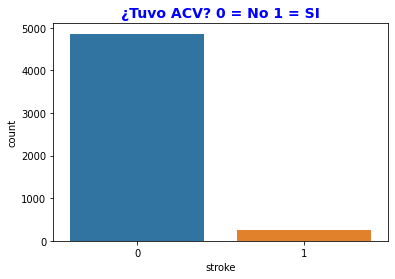

In [ ]:
ax = sns.countplot(x="stroke", data=project)
plt.title('¿Tuvo ACV? 0 = No 1 = SI', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

plt.show

Se observa que hay un gran desbalance respecto a la columna "Stroke"

In [ ]:
#Se cuentan los valores para la columna stroke
project['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<function matplotlib.pyplot.show>

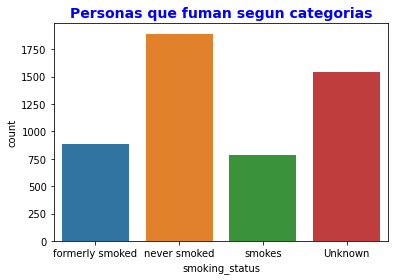

In [ ]:
#se presenta la comparación de valores para la columna "smoking_status"
ax = sns.countplot(x="smoking_status", data=project)
plt.title('Personas que fuman segun categorias', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

plt.show

En el grafico se puede observar que los fumadores en comparacion con las otras categorias son la proporcion inferior, la columna de desconocido es una de las mayores, para mejor observacion se tendria que haber evitado este desconocimiento de datos

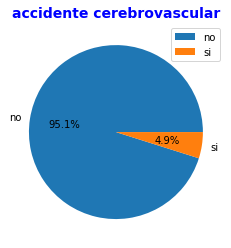

In [ ]:
#se presenta la distribución de valores para la columna Stroke
fig, ax = plt.subplots()
atack= ['no','si']
ax.pie(project['stroke'].value_counts(), autopct = '%1.1f%%', labels= atack)
plt.title('accidente cerebrovascular', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})
plt.legend()
plt.show()


De los 5109 registros de pacientes el 4,9% sufrio un accidente cerebrovascular


In [ ]:

# personas agrupadas por sexo
project['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

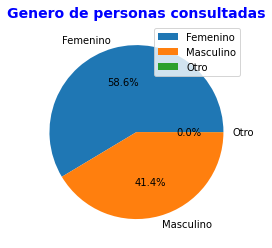

In [ ]:
# se presenta la distribución de genero en la población bajo estudio
fig, ax = plt.subplots()
atack= ['Femenino','Masculino', 'Otro']
ax.pie(project['gender'].value_counts(), autopct = '%1.1f%%', labels= atack)
plt.title('Genero de personas consultadas', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})
plt.legend()
plt.show()

Se observa una mayor demanda sanitaria de la población femenina, aunque ésta va a depender de factores tales como la edad, la localidad de procedencia y el origen de la solicitud de asistencia.

In [ ]:
#se presentan los valores unicos para la columna "Age"
project['age'].unique

<bound method Series.unique of 0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64>

In [ ]:
# se presenta la cantidad de valores para cada edad
project['age'].value_counts()

78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: age, Length: 83, dtype: int64

In [ ]:
project1= project[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]

# **Analisis bivariado**

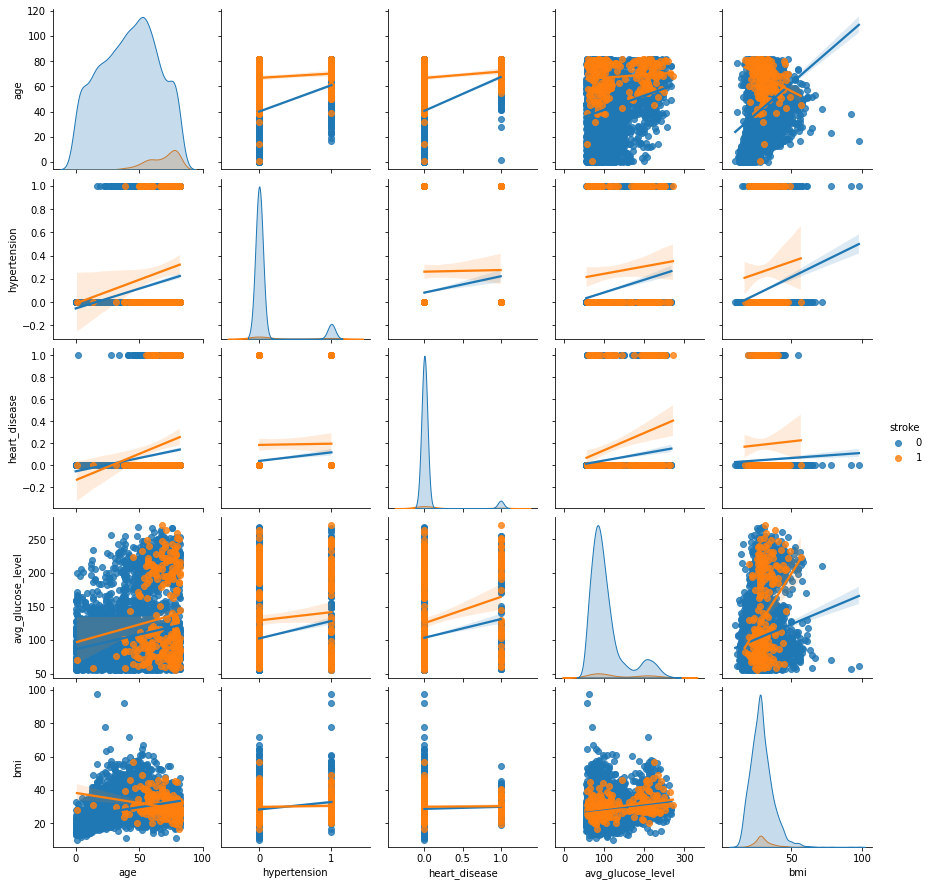

In [ ]:
#Graficos del dataset para trazar múltiples distribuciones bivariadas
sns.pairplot(data = project1, hue="stroke", dropna=False, kind='reg')



In [ ]:
project.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<function matplotlib.pyplot.show>

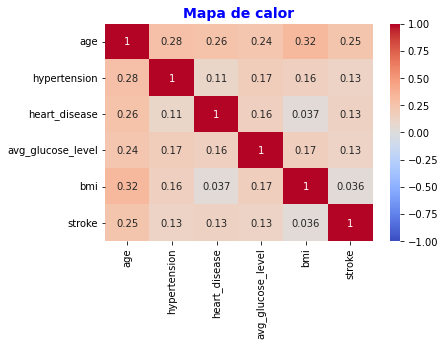

In [ ]:
#Analisis de un grafico de calor en relacion a las cariables
sns.heatmap(project1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.title('Mapa de calor', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

plt.show

Segun el mapa de calor la edad se encuentra estrechamente relacionada con estos factores:
                # bmi= indice de masa corporal
                # avg_glucose_level= glucosa media estimada
                # hypertension = hipertension
                # stroke = accidente cerebrovascular
                # heart_disease = cardiopatias 

<function matplotlib.pyplot.show>

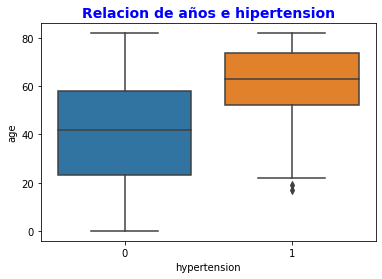

In [ ]:
ax = sns.boxplot(x='hypertension', y="age", data=project)
plt.title('Relacion de años e hipertension', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

plt.show

Segun la grafica el nivel de hipertension esta relacionado directamente con la edad de los pacientes

<function matplotlib.pyplot.show>

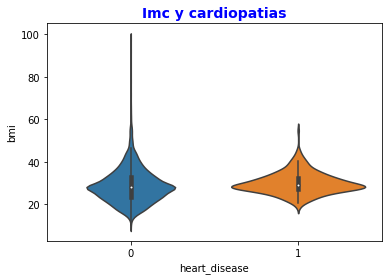

In [ ]:
ax = sns.violinplot(x="heart_disease", y="bmi", data=project)
plt.title('Imc y cardiopatias', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

plt.show

el nivel de  IMC(indice de masa corporal)que presentan las personas con cardiopatias es levemente mayor a las personas que no lo poseen

<function matplotlib.pyplot.show>

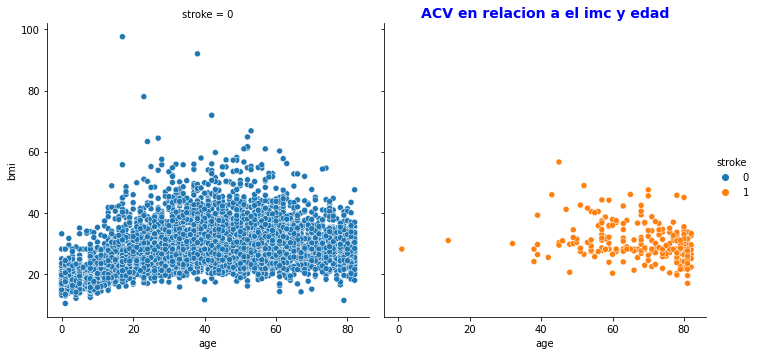

In [ ]:
sns.relplot(data=project1, x="age", y="bmi",hue="stroke", size_order="stroke",col="stroke")
plt.title('ACV en relacion a el imc y edad', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

plt.show

Algunas organizaciones consideran sobrepeso un índice superior a 27.0 bmi, por lo que se observa que la mayoria de los accidentes cerebrovasculares son en personas de 40 a 80 años con un bmi(indice de masa corporal) mayor de 20

<function matplotlib.pyplot.show>

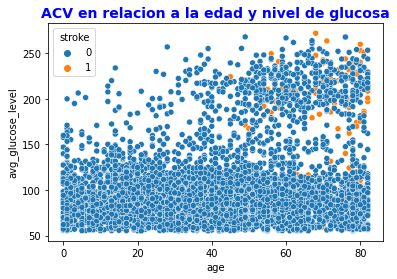

In [ ]:
ax = sns.scatterplot(x="age", y="avg_glucose_level", data=project1, hue="stroke")
plt.title('ACV en relacion a la edad y nivel de glucosa', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

plt.show

Un nivel de glucosa en la sangre de entre 140 y 199 mg/dl (7,8 a 11 mmol/l) se considera prediabetes. Esto se suele conocer como tolerancia alterada a la glucosa.
Un nivel de glucosa en la sangre de 200 mg/dl (11,1 mmol/l) o superior indica diabetes tipo 2, en la grafica se observa una mayoria de personas con indices AVG superiores a 150 y edades superiores a los 40 años.


# **Analisis multivariado**

Edad y age ==>  1.0
Edad y hypertension ==>  0.27630330893144384
Edad y heart_disease ==>  0.2636684468071711
Edad y avg_glucose_level ==>  0.23806021164123917
Edad y bmi ==>  0.32462606690787477
Edad y stroke ==>  0.2451280760965368


<Figure size 500x400 with 0 Axes>

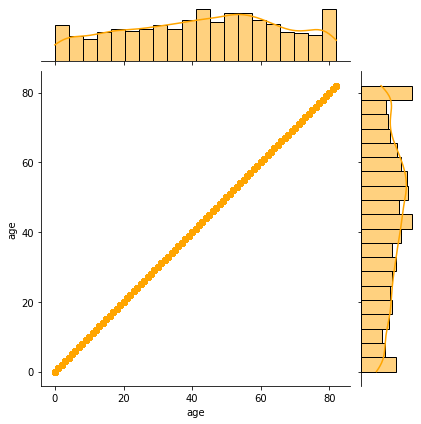

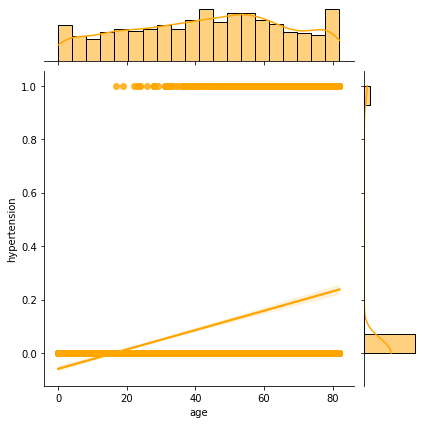

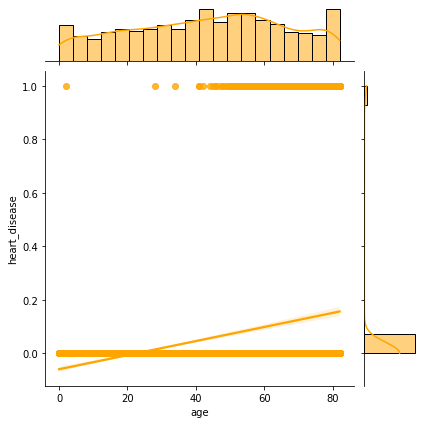

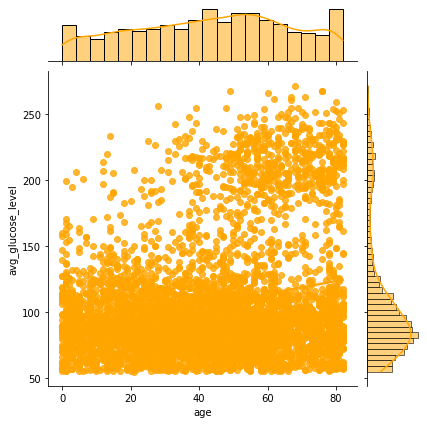

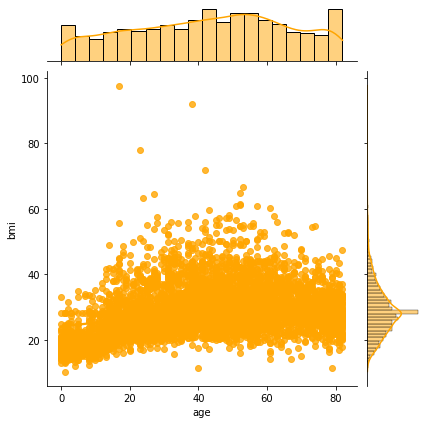

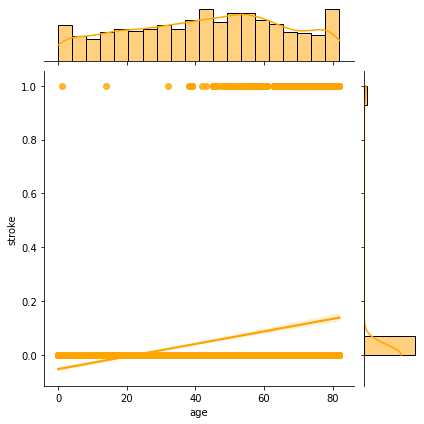

In [ ]:

plt.figure(dpi = 100, figsize = (5,4))

for i in  project1.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Edad y {i} ==> ",project1.corr().loc['age'][i])
        sns.jointplot(x='age',y=i,data=project1,kind = 'reg',color = 'orange')
        
plt.show()

Segun las Graficas la edad esta relacionada directamente con factores como el IMC, niveles de glucosa e hipertension, factores que influyen en un ACV(accidente cerebrovascular)

Text(0.5, 1.0, 'ACV relacionado a la edad e IMC')

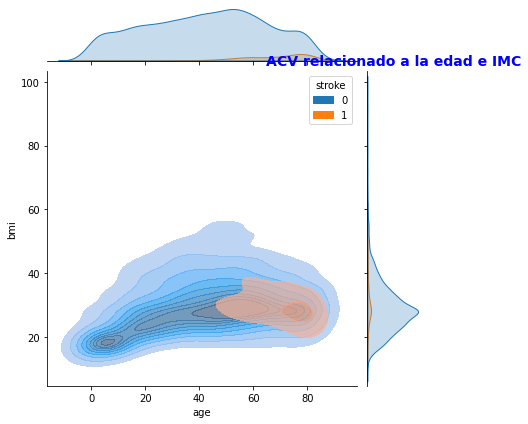

In [ ]:
sns.jointplot(data=project1, x='age', y='bmi', hue='stroke', kind='kde',
              fill=True, joint_kws={'alpha': 0.7})
plt.title('ACV relacionado a la edad e IMC', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

Nos encontramos en una conjuncion de edad e Imc donde es mas probable un acv considerando el resto de factores

Text(0.5, 1.0, 'Nivel de glucosa e IMC')

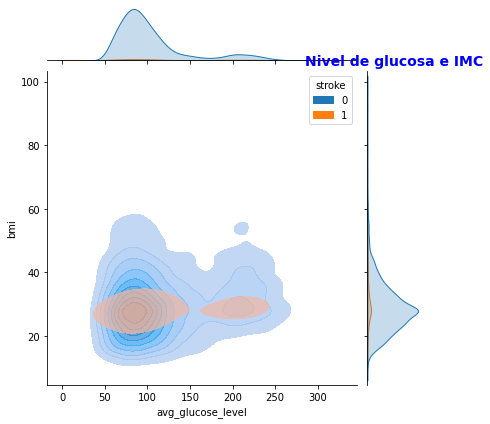

In [ ]:
sns.jointplot(data=project1, x='avg_glucose_level', y='bmi', hue='stroke', kind='kde',
              fill=True, joint_kws={'alpha': 0.7})
plt.title('Nivel de glucosa e IMC', fontdict={'fontsize': 14, 'fontweight':'bold', 'color':'blue'})

En la grafica se definen dos grupos de riesgo bien definidos que tienen la posibilidad de padecer un acv

# **Dataset Filtrado**

In [ ]:
data_numerica.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,0,1,228.69,36.6,0,1
1,1,61,0,0,1,1,0,202.21,28.1,1,1
2,0,80,0,1,1,0,0,105.92,32.5,1,1
3,1,49,0,0,1,0,1,171.23,34.4,2,1
4,1,79,1,0,1,1,0,174.12,24.0,1,1


In [ ]:
#from google.colab import files
#data_numerica.to_csv('data_numerica.csv') 
#files.download('data_numerica.csv')

Este dataset será utilizado para el tratamiento posterior

La variable a predecir, es el Output, que representará si la persona sufrió o no un accidente cerebrovascular.

Las variables que nos ayudarán a entrenar nuestro modelo, podrían ser: 

1.   Edad
2.   Genero
3.   Enfermedades
4.   Fumar 



# **Analisis de componentes principales, normalizacion y balance de clases**

In [ ]:
#Separamos los datos de entrada (variables independientes), de los datos de salida (variable dependiente o variable objetivo)
#armo x con las variable del dataset sin la variable a predecir
#defino y como la variable objetivo
X  = data_numerica.drop('stroke', axis=1) 
Y = data_numerica.stroke

In [ ]:
#Escalado de datos y Pca
escala = MinMaxScaler()
escala.fit(X)
escalada = escala.transform(X)
escalada

array([[0.        , 0.81707317, 0.        , ..., 0.80126489, 0.30126002,
        0.        ],
       [0.5       , 0.74390244, 0.        , ..., 0.67902317, 0.20389462,
        0.33333333],
       [0.        , 0.97560976, 0.        , ..., 0.23451205, 0.25429553,
        0.33333333],
       ...,
       [0.5       , 0.42682927, 0.        , ..., 0.12865848, 0.2325315 ,
        0.33333333],
       [0.        , 0.62195122, 0.        , ..., 0.51320284, 0.17525773,
        0.        ],
       [0.5       , 0.53658537, 0.        , ..., 0.13922999, 0.18213058,
        1.        ]])

In [ ]:
pca = PCA(n_components=8)
pca.fit(escalada)
Xred = pca.transform(escalada)
print(Xred.shape)
print(Xred)

(5110, 8)
[[-0.73918273 -0.47900679  0.30912053 ...  0.46204761  0.68187304
  -0.10627057]
 [-0.42792223  0.510864   -0.00122844 ... -0.15663573  0.24565072
  -0.41811644]
 [-0.61903611  0.5135558  -0.00397527 ...  0.49171036  0.56401401
   0.4034898 ]
 ...
 [-0.25708697  0.50940474  0.00574016 ... -0.26470823  0.01253419
   0.07251477]
 [-0.54011301  0.52031649  0.30678858 ...  0.06872881 -0.13773765
  -0.25648169]
 [-0.00503313 -0.50345767 -0.60263291 ... -0.28495561  0.0969125
   0.05497886]]


In [ ]:
#Comparo los dataset el original y el transformado por pca
print(X.shape)
print(Xred.shape)

(5110, 10)
(5110, 8)


In [ ]:
#MinMaxScaler 
print(pca.explained_variance_ratio_.sum())
print(pca.explained_variance_ratio_)

0.9679498426180437
[0.31705161 0.24659507 0.10898863 0.08714003 0.06254114 0.05789321
 0.05015099 0.03758915]


In [ ]:
#Escalado de datos y Pca
escala1 = StandardScaler()
escala1.fit(X)
escalada1 = escala1.transform(X)
escalada1

array([[-1.18951055,  1.0509501 , -0.32860186, ...,  2.70637544,
         1.00508597, -1.45138793],
       [ 0.83932754,  0.78583466, -0.32860186, ...,  2.12155854,
        -0.09898092, -0.53598527],
       [-1.18951055,  1.62536687, -0.32860186, ..., -0.0050283 ,
         0.47253605, -0.53598527],
       ...,
       [ 0.83932754, -0.36299889, -0.32860186, ..., -0.51144264,
         0.22574463, -0.53598527],
       [-1.18951055,  0.3439756 , -0.32860186, ...,  1.32825706,
        -0.42370648, -1.45138793],
       [ 0.83932754,  0.03467426, -0.32860186, ..., -0.46086746,
        -0.34577235,  1.29482004]])

In [ ]:
pca = PCA(n_components=8)
pca.fit(escalada1)
Xred1 = pca.transform(escalada1)
print(Xred1.shape)
print(Xred1)

(5110, 8)
[[ 3.23823869  3.23258687 -1.10040743 ... -1.82330993 -0.89584697
   1.53157282]
 [ 1.2012169   0.24587355  0.96236297 ... -1.43481051 -1.00844594
  -1.09867456]
 [ 2.43073279  2.27945517  0.74023201 ... -0.00604546  0.59528121
   1.22463785]
 ...
 [ 0.1513915  -1.05203571  0.95544272 ...  0.08171323 -0.13532213
  -0.10923749]
 [ 1.29068709  0.46408328  1.11090194 ... -0.49528535 -1.58717786
  -0.64035806]
 [-0.80686812 -0.30999815 -1.14282444 ... -0.02743005  1.01393612
  -1.13709965]]


In [ ]:
#2 Comparo los dataset el original y el transformado por pca
print(X.shape)
print(Xred1.shape)

(5110, 10)
(5110, 8)


In [ ]:
#StandarScaler 
print(pca.explained_variance_ratio_.sum())
print(pca.explained_variance_ratio_)

0.9107843667610994
[0.27293261 0.12230626 0.10025892 0.09430626 0.09041944 0.08328332
 0.07560116 0.0716764 ]


In [ ]:
#comparacion de Metodos de escalado
#MinMaxScaler variance ratio      0.9679498426180437
#StandarScaler variance ratio     0.9107843667610994

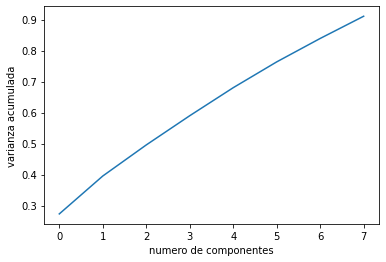

Para 8 componentes obtenemos el  0.9107843667610994 % de lo datos


In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones

fig, ax = plt.subplots()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('varianza acumulada')
plt.show()
print('Para 8 componentes obtenemos el ',pca.explained_variance_ratio_.sum(),'% de lo datos')

In [ ]:
Xred.shape

(5110, 8)

In [ ]:
df= pd.DataFrame(Xred, columns=['cp1','cp2','cp3','cp4','cp5','cp6','cp7','cp8'])
df.shape

(5110, 8)

In [ ]:
Y.shape

(5110,)

In [ ]:

#Balance de clases usando el metodo SMOTETomek

smt = SMOTETomek(random_state=42,sampling_strategy = 'auto')
df, Y = smt.fit_resample(df, Y)



In [ ]:

print('Filas y columnas del DF...........',df.shape)
print('Filas del target a predecir.......',Y.shape)
print('Balance de las clases a predecir','\n',
      Y.value_counts())

Filas y columnas del DF........... (9540, 8)
Filas del target a predecir....... (9540,)
Balance de las clases a predecir 
 1    4770
0    4770
Name: stroke, dtype: int64


# PRUEBA DE ALGORITMOS 

# Arboles de decisión

In [ ]:
X =df
print(X.shape)
print(Y.shape)

(9540, 8)
(9540,)


In [ ]:
#Importamos la libreria para hacer el split
from sklearn.model_selection import train_test_split 

#se propone separar con 30% para test y 70% para train utilizando test_size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=42) 

In [ ]:
#Importamos el modelo de arbol de decisión 
#se genera el arbol como "clf"
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3, random_state = 42, class_weight ="balanced")

In [ ]:
#Entrenamos el modelo usando x_train e Y_train
clf.fit(X_train,Y_train) 

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [ ]:
#se guardan las predicciones del entrenamient en Y_train_pred  
#se guardan las predicciones del test en Y_test_pred  
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test) 

In [ ]:
print(clf)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_test_pred)  
print('Confusion Matrix =')
print(CM)
# Accuracy
from sklearn.metrics import accuracy_score
AS = accuracy_score(Y_test, Y_test_pred)
print('Accuraccy Score =',AS)
# Recall
from sklearn.metrics import recall_score
RS =recall_score(Y_test, Y_test_pred, average=None)
print('Recall Score =',RS)
# Precision
from sklearn.metrics import precision_score
PS =precision_score(Y_test, Y_test_pred)
print('Precision Score =',PS)
from sklearn.metrics import f1_score
F1 =f1_score(Y_test, Y_test_pred, average=None)
print('F1 score', F1) 

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)
Confusion Matrix =
[[ 902  527]
 [ 181 1252]]
Accuraccy Score = 0.7526205450733753
Recall Score = [0.63121064 0.87369156]
Precision Score = 0.7037661607644744
F1 score [0.71815287 0.77957659]


Conclusiòn: Con F1 Score se tiene una predicciòn de 0.78 ,porque es una métrica de evaluación de un solo número para que luego se optimice.


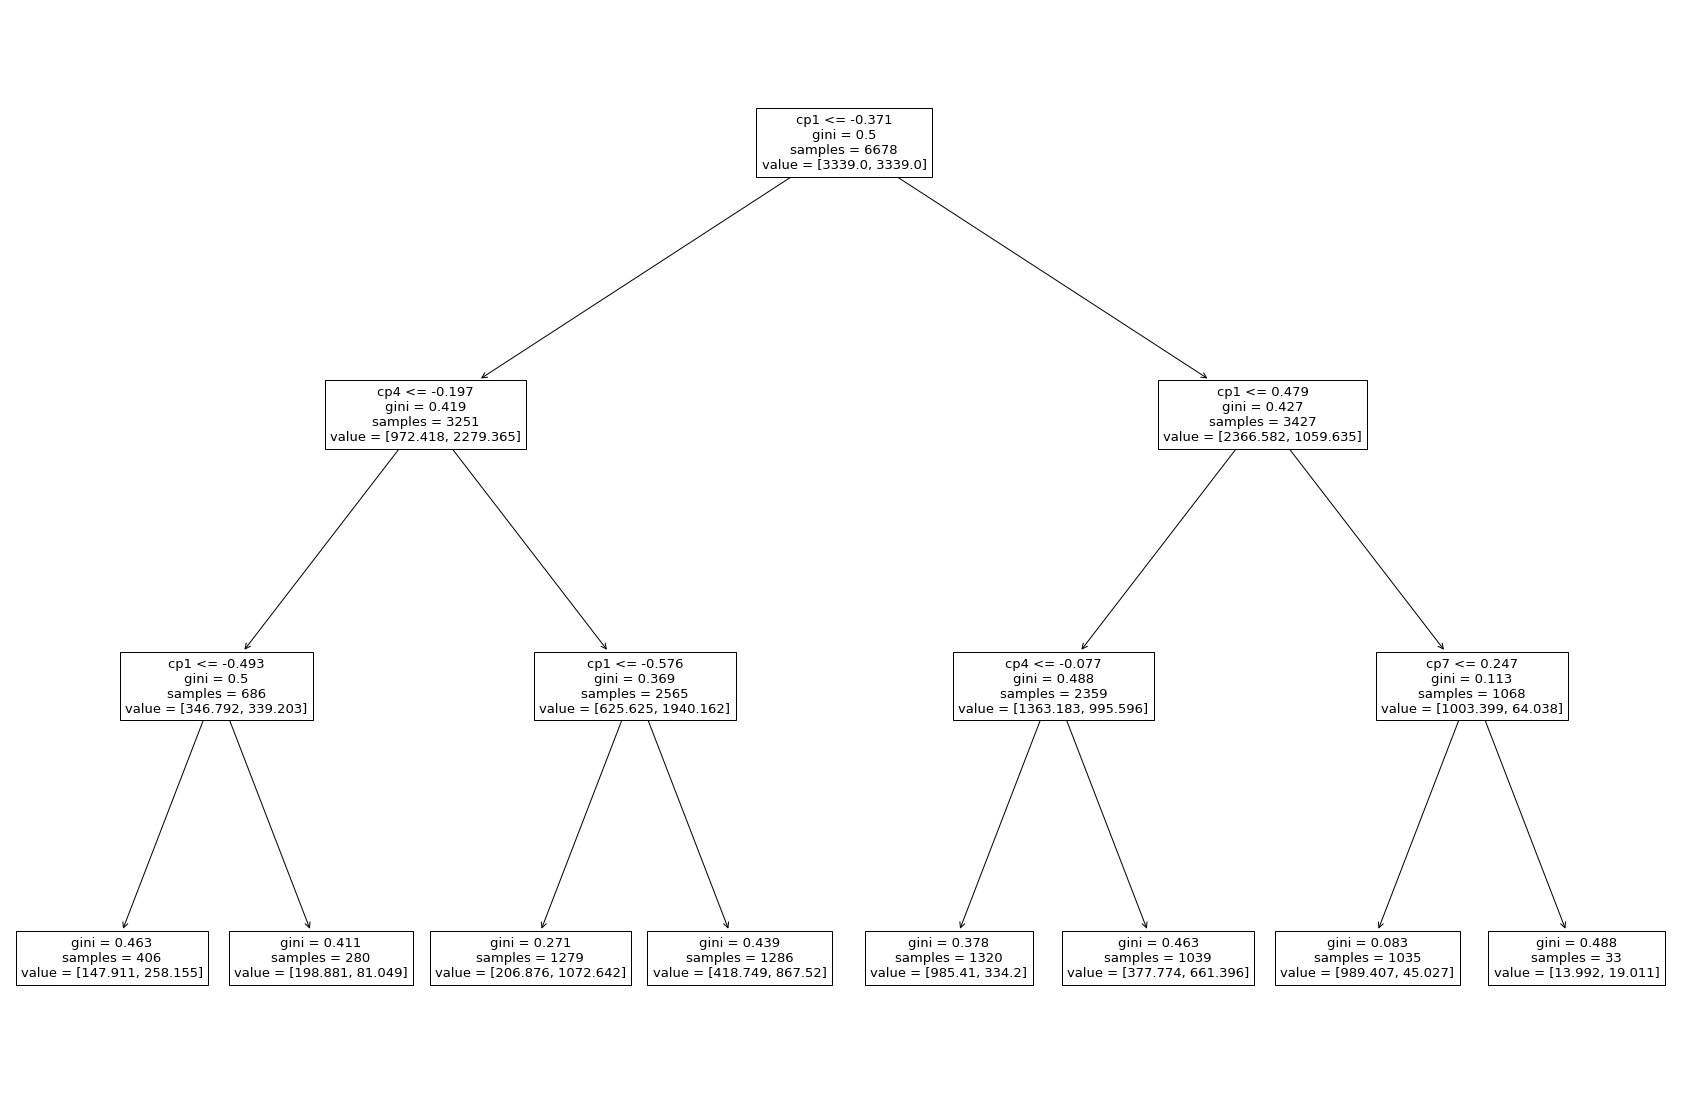

In [ ]:
#Se plotea el arbol de decisión generado 
plt.figure(figsize=(30,20),facecolor='White', edgecolor='Red')
tree.plot_tree(clf, feature_names= X.columns,)
plt.show()

# Regresión Logistica

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_reg = LogisticRegression(random_state=0,  class_weight= 'balanced').fit(X_train_scal, Y_train)


In [ ]:
#se guardan las predicciones del entrenamient en Y_train_pred  
#se guardan las predicciones del test en Y_test_pred  
Y_train_pred_reg = clf_reg.predict(X_train_scal)
Y_test_pred_reg = clf_reg.predict(X_test) #Prediccion en Test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:

#Calculo el accuracy en Train
train_accuracy = accuracy_score(Y_train, Y_train_pred_reg)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(Y_test, Y_test_pred_reg)
accuracy_dif = train_accuracy - test_accuracy

#se imprimen los resultados de la metrica
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de diferencia "entrenamiento - evaluación":', accuracy_dif)

% de aciertos sobre el set de entrenamiento: 0.7491764001197964
% de aciertos sobre el set de evaluación: 0.6705101327742837
% de diferencia "entrenamiento - evaluación": 0.07866626734551263


In [ ]:
print(clf_reg)
# Confusion Matrix

CM = confusion_matrix(Y_test, Y_test_pred_reg)  
print('Confusion Matrix =')
print(CM)
# Accuracy

AS = accuracy_score(Y_test, Y_test_pred_reg)
print('Accuraccy Score =',AS)
# Recall

RS =recall_score(Y_test, Y_test_pred_reg, average=None)
print('Recall Score =',RS)
# Precision

PS =precision_score(Y_test, Y_test_pred_reg)
print('Precision Score =',PS)
from sklearn.metrics import f1_score
F1 =f1_score(Y_test, Y_test_pred_reg, average=None)
print('F1 score', F1) 

LogisticRegression(class_weight='balanced', random_state=0)
Confusion Matrix =
[[ 595  834]
 [ 109 1324]]
Accuraccy Score = 0.6705101327742837
Recall Score = [0.41637509 0.9239358 ]
Precision Score = 0.6135310472659871
F1 score [0.55789967 0.73739905]


In [ ]:


#Calculo el accuracy en Train
train_accuracy = accuracy_score(Y_train, Y_train_pred_reg)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(Y_test, Y_test_pred_reg)
accuracy_dif = train_accuracy - test_accuracy

#se imprimen los resultados de la metrica
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de diferencia "entrenamiento - evaluación":', accuracy_dif)

% de aciertos sobre el set de entrenamiento: 0.7491764001197964
% de aciertos sobre el set de evaluación: 0.6705101327742837
% de diferencia "entrenamiento - evaluación": 0.07866626734551263


Se observa que el modelo entrenado está sobre ajustado hay una diferencia del 89% entre los aciertos del modelo para el conjunto de entrenamiento vs el de evaluación 

In [ ]:

#penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},

In [ ]:
#se propone modificar algunos parametros "penalty"  y"solver" para observar si hay mejoras en las metricas

clf_reg2 = LogisticRegression(random_state=0, solver = 'sag', penalty= 'none' , class_weight= 'balanced').fit(X_train_scal, Y_train)
#se guardan las predicciones del entrenamient en Y_train_pred_reg2 
#se guardan las predicciones del test en Y_test_pred_reg2
Y_train_pred_reg2 = clf_reg2.predict(X_train_scal)
Y_test_pred_reg2 = clf_reg2.predict(X_test)
#Calculo el accuracy en Train
train_accuracy2 = accuracy_score(Y_train, Y_train_pred_reg2)

#Calculo el accuracy en Test
test_accuracy2 = accuracy_score(Y_test, Y_test_pred_reg2)
accuracy_dif2 = train_accuracy2 - test_accuracy2

#se imprimen los resultados de la metrica
print('% de aciertos sobre el set de entrenamiento:', train_accuracy2)
print('% de aciertos sobre el set de evaluación:',test_accuracy2)
print('% de diferencia "entrenamiento - evaluación":', accuracy_dif2)

% de aciertos sobre el set de entrenamiento: 0.7488769092542678
% de aciertos sobre el set de evaluación: 0.6705101327742837
% de diferencia "entrenamiento - evaluación": 0.07836677647998402


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Random Forest
clf_random = RandomForestClassifier(random_state=30,max_depth=2, class_weight ="balanced", max_features="log2")
clf_random.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='log2', random_state=30)

In [ ]:
Y_train_pred_random = clf_random.predict(X_train)
Y_test_pred_random = clf_random.predict(X_test)

In [ ]:
#se importa la libreria con los accuracy_score para evaluar el modelo
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy2 = accuracy_score(Y_train, Y_train_pred_random)

#Calculo el accuracy en Test
test_accuracy2 = accuracy_score(Y_test, Y_test_pred_random)

#se imprimen los resultados de la metrica
print('% de aciertos sobre el set de entrenamiento:', train_accuracy2)
print('% de aciertos sobre el set de evaluación:',test_accuracy2)

% de aciertos sobre el set de entrenamiento: 0.7448337825696316
% de aciertos sobre el set de evaluación: 0.7250174703004891


In [ ]:
print(clf_random)
# Confusion Matrix

CM = confusion_matrix(Y_test, Y_test_pred_random)  
print('Confusion Matrix =')
print(CM)
# Accuracy

AS = accuracy_score(Y_test, Y_test_pred_random)
print('Accuraccy Score =',AS)
# Recall

RS =recall_score(Y_test, Y_test_pred_random, average=None)
print('Recall Score =',RS)
# Precision

PS =precision_score(Y_test, Y_test_pred_random)
print('Precision Score =',PS)
from sklearn.metrics import f1_score
F1 =f1_score(Y_test, Y_test_pred_random, average=None)
print('F1 score', F1) 

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='log2', random_state=30)
Confusion Matrix =
[[ 980  449]
 [ 338 1095]]
Accuraccy Score = 0.7250174703004891
Recall Score = [0.68579426 0.76413119]
Precision Score = 0.7091968911917098
F1 score [0.71350564 0.73563991]


In [ ]:
print(classification_report(Y_test, Y_test_pred_random))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1429
           1       0.71      0.76      0.74      1433

    accuracy                           0.73      2862
   macro avg       0.73      0.72      0.72      2862
weighted avg       0.73      0.73      0.72      2862



# **ExtraTreesClassifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf_e = ExtraTreesClassifier(n_estimators=5, max_depth=None, min_samples_split=2, random_state=0,criterion="gini")
clf_e.fit(X_train,Y_train) 
Y_test_clf_e = clf.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_test_clf_e))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72      1429
           1       0.70      0.87      0.78      1433

    accuracy                           0.75      2862
   macro avg       0.77      0.75      0.75      2862
weighted avg       0.77      0.75      0.75      2862



In [ ]:
from sklearn.model_selection import cross_validate
boost= ExtraTreesClassifier()
result= cross_validate(boost, X, Y, cv=6, return_train_score=True)
result

{'fit_time': array([0.59155107, 0.58828568, 0.57999372, 0.57592964, 0.60542274,
        0.56574893]),
 'score_time': array([0.05938101, 0.06392646, 0.06505966, 0.05914998, 0.05765009,
        0.05846715]),
 'test_score': array([0.95157233, 0.93584906, 0.94339623, 0.9490566 , 0.95597484,
        0.95786164]),
 'train_score': array([1., 1., 1., 1., 1., 1.])}

In [ ]:
test_score= result['test_score']
train_score= result['train_score']

print('train', np.mean(train_score))
print('test', np.mean(test_score))

train 1.0
test 0.94895178197065


# GradientBoostingClassifier (2º algoritmo con mejores metricas)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,random_state = 42, )
gbrt.fit(X_train, Y_train)
gbrt.score(X_test, Y_test)

0.8336827393431167

In [ ]:
Y_test_gbrt = gbrt.predict(X_test)

# Metricas GradientBoostingClassifier

In [ ]:
print(gbrt)
# Confusion Matrix

CM = confusion_matrix(Y_test, Y_test_gbrt)  
print('Confusion Matrix =')
print(CM)
# Accuracy

AS = accuracy_score(Y_test, Y_test_gbrt)
print('Accuraccy Score =',AS)
# Recall

RS =recall_score(Y_test, Y_test_gbrt, average=None)
print('Recall Score =',RS)
# Precision

PS =precision_score(Y_test, Y_test_gbrt)
print('Precision Score =',PS)
from sklearn.metrics import f1_score
F1 =f1_score(Y_test, Y_test_gbrt, average=None)
print('F1 score', F1)

GradientBoostingClassifier(random_state=42)
Confusion Matrix =
[[1114  315]
 [ 161 1272]]
Accuraccy Score = 0.8336827393431167
Recall Score = [0.77956613 0.88764829]
Precision Score = 0.8015122873345936
F1 score [0.8239645  0.84238411]


In [ ]:
print(classification_report(Y_test, Y_test_gbrt))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1429
           1       0.80      0.89      0.84      1433

    accuracy                           0.83      2862
   macro avg       0.84      0.83      0.83      2862
weighted avg       0.84      0.83      0.83      2862



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


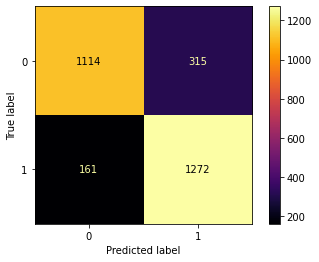

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(Y_test, Y_test_gbrt)  
plot_confusion_matrix(gbrt,X_test, Y_test, cmap='inferno')

Conclusiones:
La matriz de confusión nos muestra que hay 1114 verdaderos positivos y 315 falsos positivos, tambièn que hay 161 falsos negativos y 1272 verdaderos negativos. 
En el ejemplo del problema de STROKE digamos que de 100 personas, solo 5 personas tienen ACV Definitivamente queremos capturar todos los casos de ACV y podríamos terminar haciendo una clasificación cuando la persona que realmente NO tiene ACV se clasifica como enferma. Por eso se plantea minimizar los falsos positivos.

# Optimizar hiperparametros de GradientBoostingClassifier

Cross Validate

In [ ]:
from sklearn.model_selection import cross_val_score
boostg= GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,random_state = 42)
result1= cross_validate(boostg, X, Y, cv=5, return_train_score=True)
result1

{'fit_time': array([2.4205749 , 2.41847968, 2.35295892, 2.38741255, 2.37983227]),
 'score_time': array([0.00555968, 0.00567651, 0.00614452, 0.00551105, 0.00586438]),
 'test_score': array([0.83857442, 0.82966457, 0.81761006, 0.84224319, 0.85010482]),
 'train_score': array([0.860587  , 0.85416667, 0.86281447, 0.86124214, 0.85521488])}

In [ ]:
test_score1= result1['test_score']
train_score1= result1['train_score']

print('Validacion cruzada promedio de train', np.mean(train_score1))
print('Validacion cruzada promedio de test', np.mean(test_score1))

Validacion cruzada promedio de train 0.858805031446541
Validacion cruzada promedio de test 0.8356394129979036


Grilla busqueda CV

In [ ]:
from sklearn.model_selection import GridSearchCV



In [ ]:
parameter = {'criterion' :['friedman_mse', 'squared_error'],
            'min_samples_split':[9,10,11],
            'min_samples_leaf':[1,2,3],
            'max_depth':[9,10,11]}

In [ ]:
estimador= GradientBoostingClassifier()
gridg= GridSearchCV(estimador, cv=5 , param_grid = parameter)
grid_fit= gridg.fit(X_train,Y_train)
sorted(gridg.cv_results_.keys())
print(grid_fit.cv_results_['mean_test_score'])
best_model= grid_fit.best_params_


[0.91614255 0.91524412 0.91584281 0.91629247 0.91404629 0.91494573
 0.91704187 0.91943719 0.91928861 0.91779127 0.91689172 0.91764056
 0.9186888  0.92003712 0.91853899 0.91958656 0.92063569 0.92123506
 0.91809    0.91644262 0.92093487 0.9191379  0.91973659 0.92198311
 0.92018704 0.92078551 0.9216836  0.91374722 0.91524434 0.91689105
 0.91704176 0.91809011 0.91883906 0.91689195 0.92003656 0.91749142
 0.9182397  0.91988719 0.9168915  0.92018671 0.92018704 0.91719236
 0.91764034 0.92093543 0.9194382  0.91973794 0.91793963 0.91838906
 0.91764067 0.91973738 0.91913757 0.92153345 0.92258191 0.92183386]


In [ ]:
print(best_model)

{'criterion': 'squared_error', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [ ]:
gridg.best_estimator_

GradientBoostingClassifier(criterion='squared_error', max_depth=11,
                           min_samples_leaf=3, min_samples_split=10)

In [ ]:
gridg.best_score_

0.9225819148220413

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

estimador= GradientBoostingClassifier()
parameters1= {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, 21),
    "min_samples_leaf": range(1, 5)
}
gridr= RandomizedSearchCV(estimador, random_state=42, param_distributions = parameters1, n_iter = 10, n_jobs=-1)
grid_fitr= gridr.fit(X_train,Y_train)
gridr.best_params_



{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [ ]:
gridr.best_estimator_


GradientBoostingClassifier(max_depth=10, min_samples_split=10)

In [ ]:
gridr.best_score_

0.9153943797797662

# Conclusiones:
Se puede observar que se tiene un mayor rendimiento con Grilla busqueda CV porque realiza una búsqueda, no aleatoria en todo el espacio formado por las posibles combinaciones de los parámetros. Su desventaja es que toma mucho tiempo en ejecutarse a comparaciòn de randomized searchCV que lo toma de forma aleatoria.

# **Algoritmo con las optimizaciones obtenida**s

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrto= GradientBoostingClassifier(learning_rate=0.1,
                                  n_estimators=100,
                                  random_state = 42,
                                  max_depth=11, 
                                  min_samples_leaf=3,
                                  min_samples_split=9 )
gbrto.fit(X_train, Y_train)
gbrto.score(X_test, Y_test)

0.926974143955276

In [ ]:
Y_test_gbrto = gbrto.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_test_gbrto))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1429
           1       0.90      0.96      0.93      1433

    accuracy                           0.93      2862
   macro avg       0.93      0.93      0.93      2862
weighted avg       0.93      0.93      0.93      2862



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


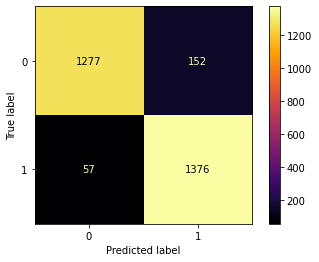

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(Y_test, Y_test_gbrto)  
plot_confusion_matrix(gbrto,X_test, Y_test, cmap='inferno')

Conclusiones:
Se planteó minimizar los falsos positivos que inicialmente eran 315, ahora con la optimización usando gradient Boostiing Classifier los falsos positivos se reducen a 152.

In [ ]:
gbrto

GradientBoostingClassifier(max_depth=11, min_samples_leaf=3,
                           min_samples_split=9, random_state=42)

# **XGBoost ( algoritmo con mejores metricas )** 

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.8, max_depth = 5, alpha = 10, n_estimators = 25)
xg_reg.fit(X_train,Y_train)

Y_test_xgb = xg_reg.predict(X_test)

In [ ]:
#reg:logistic

In [ ]:
print(xg_reg)
# Confusion Matrix

CM = confusion_matrix(Y_test, Y_test_xgb)  
print('Confusion Matrix =')
print(CM)

# Accuracy

AS = accuracy_score(Y_test, Y_test_xgb)
print('Exactitud= Accuraccy Score =',AS)

# Recall

RS =recall_score(Y_test, Y_test_xgb)
print('Sensibilidad= Recall Score =',RS)

# Precision

PS =precision_score(Y_test, Y_test_xgb)
print('Precision= Precision Score =',PS)

#F1 score

F1 =f1_score(Y_test, Y_test_xgb)
print('F1 score', F1)



XGBClassifier(alpha=10, colsample_bytree=0.3, learning_rate=0.8, max_depth=5,
              n_estimators=25)
Confusion Matrix =
[[1167  262]
 [ 155 1278]]
Exactitud= Accuraccy Score = 0.8542976939203354
Sensibilidad= Recall Score = 0.8918353105373342
Precision= Precision Score = 0.8298701298701299
F1 score 0.8597376387487387


**El mejor rendimiento dentro de los modelos de algoritmos basados en los resultados, se en cuentra el xgboostClassiffier,se optimizo con learning_rate 0,8 y n_estimators = 25 **

# Metricas del algoritmo xgboost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


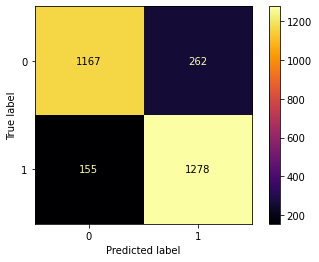

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(Y_test, Y_test_xgb)  
plot_confusion_matrix(xg_reg,X_test, Y_test, cmap='inferno')

In [ ]:

print(classification_report(Y_test, Y_test_xgb))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1429
           1       0.83      0.89      0.86      1433

    accuracy                           0.85      2862
   macro avg       0.86      0.85      0.85      2862
weighted avg       0.86      0.85      0.85      2862



In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
joblib.dump(gbrto, 'Modelo_entrenado_gbrt.pkl')

['Modelo_entrenado_gbrt.pkl']

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

# Mejora del algoritmo xgboost

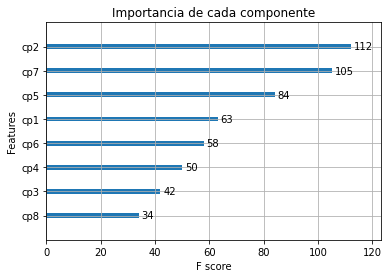

In [ ]:

from xgboost import plot_importance
# Plot feature importance
plot_importance(xg_reg,title='Importancia de cada componente', xlabel='F score', ylabel='Features', grid=True)

## **Conclusiones:**
¿Por qué busca la importancia de las características?
La importancia de la característica muestra cuánto ha contribuido cada característica al modelo.
Se puede tomar esta información y eliminar las características que no contribuyen mucho para reducir la dimensionalidad (y ahorrar computación).
Se pueden mejorar las características que no aportan mucho al modelo en general o se pueden mejorar las características que aportan más al modelo.
Las cifras de importancia de las características también muestran a las personas que no están familiarizadas con el problema qué características de sus datos son más importantes a la hora de hacer predicciones con modelos de aprendizaje automático.

# **Curva roc de los modelos elegidos  --seccion a Prueba--**

In [ ]:
#Prediccion de probabilidades
r_probs = [0 for _ in range(len(Y_test))]
gbrto_probs = gbrto.predict(X_test)
xgb_probs = xg_reg.predict(X_test)

In [ ]:
#Las probabilidades para el resultado positivo se mantienen
gbrto_probs = rf_probs[:, 1]
xg_reg_probs = nb_probs[:, 1]

In [ ]:
#Importacion de libreria de auroc
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
#Calculo de auroc
r_auc = roc_auc_score(Y_test, r_probs)
gbrto_auc = roc_auc_score(Y_test, gbrto_probs)
xgb_auc = roc_auc_score(Y_test, xgb_probs)

In [ ]:
#impresion de Auroc score
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('GradienBoost Forest: AUROC = %.3f' % (gbrto_auc))
print('XGBoost: AUROC = %.3f' % (xgb_auc))

Random (chance) Prediction: AUROC = 0.500
GradienBoost Forest: AUROC = 0.927
XGBoost: AUROC = 0.854


In [ ]:
#Calculo de la curva roc
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
gbrto_fpr, gbrto_tpr, _ = roc_curve(Y_test, gbrto_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, xgb_probs)

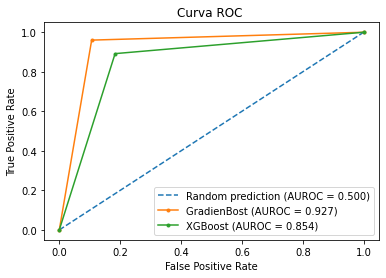

In [ ]:
#plot de la curva roc
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(gbrto_fpr, gbrto_tpr, marker='.', label='GradienBost (AUROC = %0.3f)' % gbrto_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (AUROC = %0.3f)' % xgb_auc)

# Title
plt.title('Curva ROC ')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# **Conclusiones:**
Según el gráfico se puede observar que la curva que más se acerca 1 es GradientBost, por lo tanto es la más apropiada.
Ayuda a comparar diferentes clasificadores. Se puede resumir cómo funciona cada clasificador en una sola medida.
La curva ROC es útil para:
Conocer el rendimiento global de una prueba. Area bajo la curva.
Comparar dos pruebas o dos puntos de corte. Comparación de dos curvas o de dos puntos sobre una curva. 
Elegir el punto de corte apropiado para un determinado paciente.